In [36]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import missingno as ms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

telco = pd.read_csv('W04a_churn.csv')

In [73]:
#Visualization
print(telco)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [74]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
counts = telco['Churn'].value_counts().to_dict()
print(counts)

{'No': 5174, 'Yes': 1869}


In [76]:
mis = telco.isna().sum()
mis_per = telco.isna().sum()/len(telco)*100
mis_per

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [77]:
mis_table = pd.concat([mis, mis_per], axis=1)
mis_table1 = mis_table.rename(columns = {0:'Missing Values', 1:'Missing Percent (%)'})
mis_table1

,Missing Values,Missing Percent (%)
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


<AxesSubplot:>

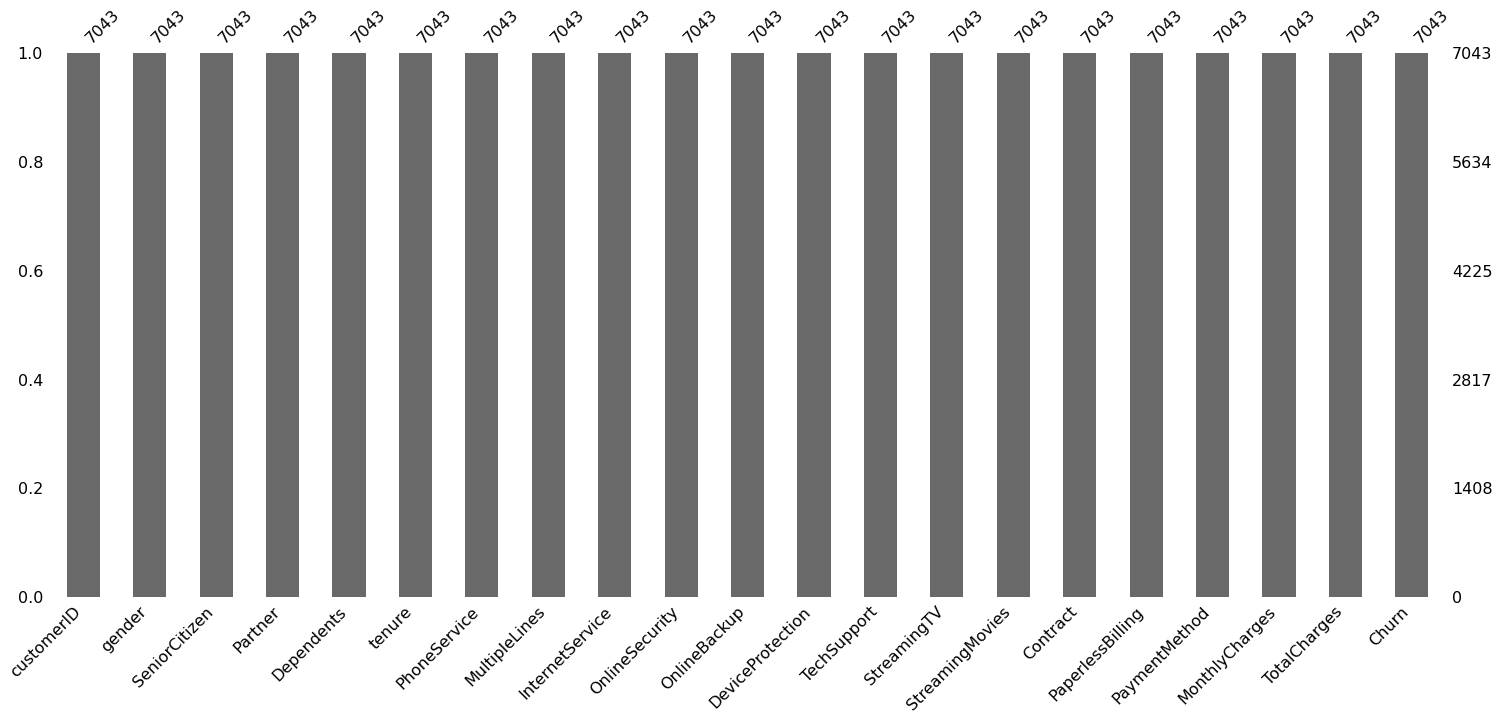

In [78]:
ms.bar(telco)

<AxesSubplot:>

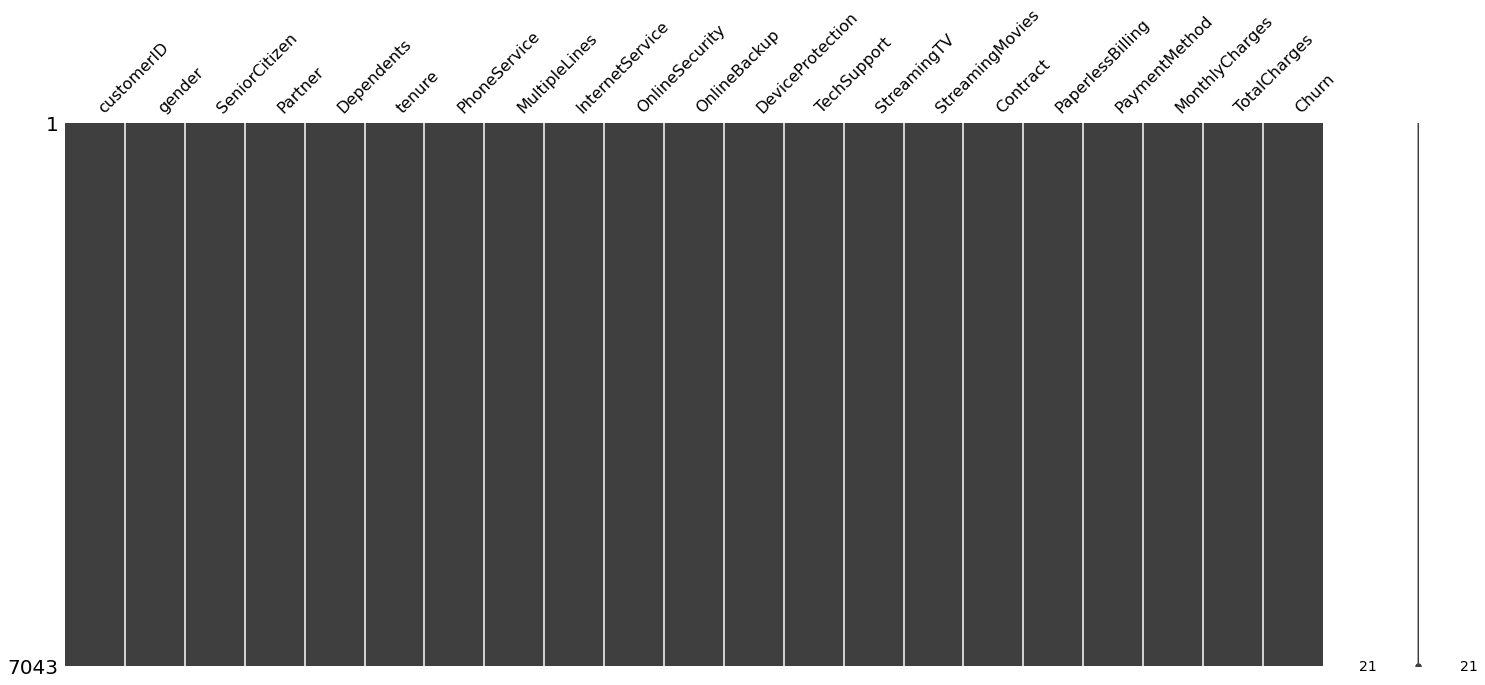

In [79]:
ms.matrix(telco)

<AxesSubplot:>

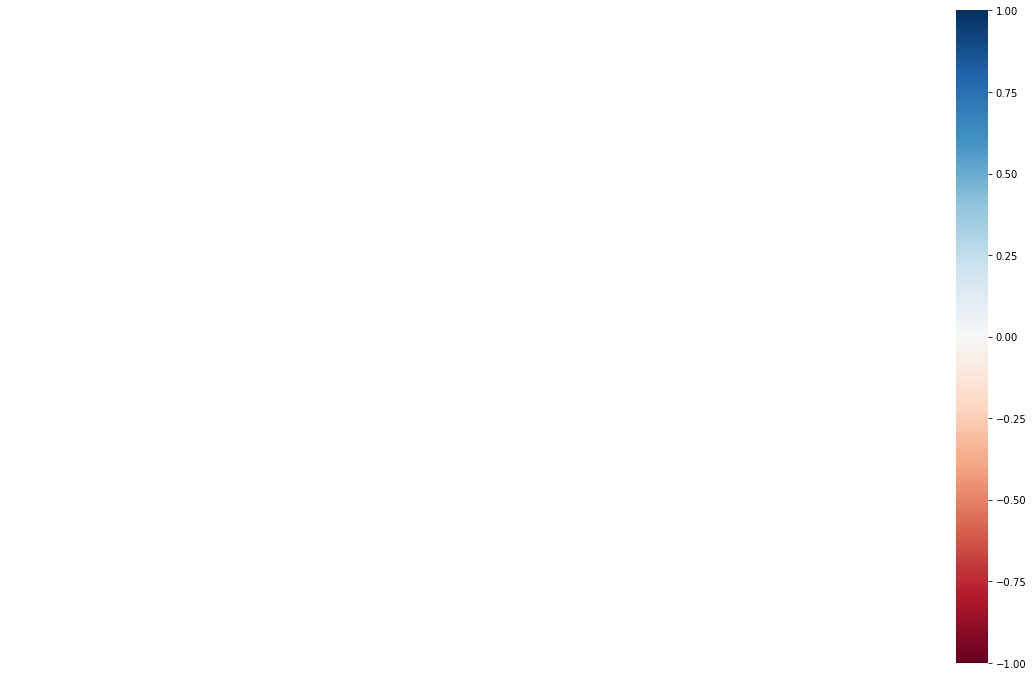

In [80]:
ms.heatmap(telco)

In [82]:
column_headers = list(telco.columns.values)
print(column_headers)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [198]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [201]:
#Change categorical variables
telco.Churn.replace({"Yes":1, "No":0}, inplace = True)
telco_new = pd.get_dummies(telco, columns=['gender', 'Partner', 
                                           'Dependents', 'PhoneService', 
                                           'MultipleLines', 'InternetService', 'OnlineSecurity',
                                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                           'StreamingTV', 'StreamingMovies', 'Contract', 
                                           'PaperlessBilling', 'PaymentMethod'], drop_first=True)
telco_new.info()
column_headers = list(telco_new.columns.values)
print(column_headers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [242]:
#regression 1
y = telco[['Churn']]
x = telco_new[[ 'Partner_Yes', 'Dependents_Yes', 'Contract_One year', 
               'Contract_Two year','PaperlessBilling_Yes' ]] 
X = sm.add_constant(x) 
logit = sm.Logit(y,X)
eq01=logit.fit()
print(eq01.summary())

Optimization terminated successfully.
         Current function value: 0.468153
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7037
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.1909
Time:                        18:04:58   Log-Likelihood:                -3297.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6772      0.060    -11.219      0.000      -0.796      -0.559

In [243]:
#regression 2
y = telco[['Churn']]
x2 = telco_new[['Dependents_Yes', 'Contract_One year', 
               'Contract_Two year','PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)'  ]] 
X2 = sm.add_constant(x2) 
logit2 = sm.Logit(y,X2)
eq02=logit2.fit()
print(eq02.summary())

Optimization terminated successfully.
         Current function value: 0.466248
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7037
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.1942
Time:                        18:04:58   Log-Likelihood:                -3283.8
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6429      

In [244]:
#predicted probability 1
logit1b = LogisticRegression()  
logit1b.fit(X, y)
pred1 = logit1b.predict(X)
pred1

array([0, 0, 1, ..., 0, 0, 0])

In [247]:
#predicted probability 2
logit2b = LogisticRegression() 
logit2b.fit(X2, y)
pred2 = logit2b.predict(X2)
pred2

array([1, 0, 1, ..., 0, 1, 0])

Accuracy: 0.742, Precision: 0.518, Recall: 0.421, F1: 0.465
Confusion Matrix:
 [[4442 1082]
 [ 732  787]]


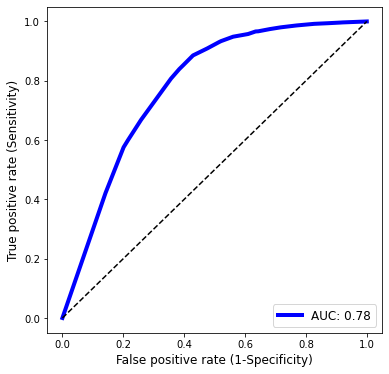

In [258]:
#accuracy, precision, recall, F1, confusion matrix, ROC curve
accuracy = metrics.accuracy_score(y, pred1)
precision = metrics.precision_score(y, pred1)
recall = metrics.recall_score(y, pred1)
f1 = metrics.f1_score(y, pred1)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

confus = metrics.confusion_matrix(pred1, y)
print('Confusion Matrix:\n', confus)

pred1_prob = eq01.predict(X)
fpr, tpr, _ = metrics.roc_curve(y, pred1_prob)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

Accuracy: 0.751, Precision: 0.532, Recall: 0.515, F1: 0.523
Confusion Matrix:
 [[4327  907]
 [ 847  962]]


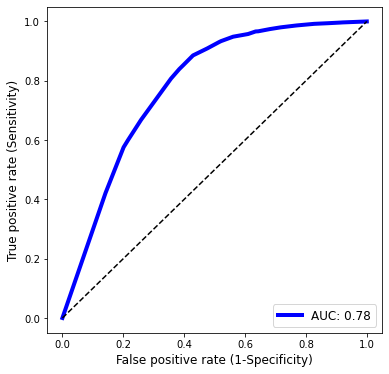

In [259]:
#accuracy, precision, recall, F1, confusion matrix, ROC curve
accuracy = metrics.accuracy_score(y, pred2)
precision = metrics.precision_score(y, pred2)
recall = metrics.recall_score(y, pred2)
f1 = metrics.f1_score(y, pred2)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

confus = metrics.confusion_matrix(pred2, y)
print('Confusion Matrix:\n', confus)

pred2_prob = eq02.predict(X)
fpr, tpr, _ = metrics.roc_curve(y, pred1_prob)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

In [260]:
from sklearn.metrics import f1_score
from numpy import argmax
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(pred1_prob, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.254, F1-Score = 0.5784


In [261]:
from sklearn.metrics import f1_score
from numpy import argmax
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(pred2_prob, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.178, F1-Score = 0.4867


In [269]:
pred03 = list(map(lambda x: 1 if x > 0.254 else 0, pred1_prob))
accuracy = metrics.accuracy_score(y, pred03)
precision = metrics.precision_score(y, pred03)
recall = metrics.recall_score(y, pred03)
f1 = metrics.f1_score(y, pred03)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.675, Precision: 0.441, Recall: 0.839, F1: 0.578


In [270]:
pred03 = list(map(lambda x: 1 if x > 0.178 else 0, pred2_prob))
accuracy = metrics.accuracy_score(y, pred03)
precision = metrics.precision_score(y, pred03)
recall = metrics.recall_score(y, pred03)
f1 = metrics.f1_score(y, pred03)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.573, Precision: 0.357, Recall: 0.763, F1: 0.487
